# **Word Graph - UAS**

# **Nama : Ahya Cinta Azka M.**
# **NIM  : 220411100122**
# **Mata Kuliah : Pencarian dan Penambangan Web**

#Import Library

In [ ]:
pip install --upgrade pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 93.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/PPW/UAS/word_graph

/content/drive/MyDrive/PPW/UAS/word_graph


In [ ]:
import pymupdf

doc = pymupdf.open("/content/drive/MyDrive/PPW/UAS/word_graph/paper global warming.pdf") # open a document
out = open("/content/drive/MyDrive/PPW/UAS/word_graph/output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [ ]:
%%capture
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
with open('/content/drive/MyDrive/PPW/UAS/word_graph/output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

Jurnal Phi: Jurnal Pendidikan Fisika dan Fisika Terapan. Vol 8 (1), 2022; ISSN: 2549-7162 Hal. 1-10 
Ainurrohmah, S., Sudarti, S. 2022. Perubahan Ikliklim dan Pemanasan Global. Vol 8 (1), 2022 silpinu


In [ ]:
# Install: pip install nltk
import nltk
#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
sentences = nltk.sent_tokenize(teks)
print(sentences)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

['Jurnal Phi: Jurnal Pendidikan Fisika dan Fisika Terapan.', 'Vol 8 (1), 2022; ISSN: 2549-7162 Hal.', '1-10 \nAinurrohmah, S., Sudarti, S. 2022.', 'Perubahan Ikliklim dan Pemanasan Global.', 'Vol 8 (1), 2022 silpinurrohmah@gmail.com 1 \n \n \n \n \n \n \n \nJenis Artikel: review article \nAnalisis Perubahan Iklim dan Global Warming \nyang Terjadi sebagai Fase Kritis \nSilfia Ainurrohmah1, dan Sudarti Sudarti1 \n1Program Studi Pendidikan Fisika, FKIP Universitas Jember \nCorresponding e-mail: silpinurrohmah@gmail.com \n \n \nKATA KUNCI: \nperubahan iklim, \nglobal warming, \ntemperatur \n \nDiserahkan: 25 Nov 2021 \nDirevisi: 16 Des 2021 \nDiterima: 18 Des 2021 \nDiterbitkan: 15 Jan 2022 \nTerbitan daring: 18 Jan 2022 \n \n \n \n \n \n1.', 'Pendahuluan \nPemanasan global (global warming) dan perubahan iklim yang terjadi tidak hanya telah dialami suatu negara \nsaja melainkan secara global termasuk Indonesia.', 'Indonesia termasuk negara besar yang mempunyai banyak \npulau dan lautan.', 

In [ ]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0    Jurnal Phi: Jurnal Pendidikan Fisika dan Fisik...
1                Vol 8 (1), 2022; ISSN: 2549-7162 Hal.
2            1-10 \nAinurrohmah, S., Sudarti, S. 2022.
3             Perubahan Ikliklim dan Pemanasan Global.
4    Vol 8 (1), 2022 silpinurrohmah@gmail.com 1 \n ...
..                                                 ...
533  Daftar Pustaka dari Wabsite : \n \nBaylis, M. ...
534                                              2006.
535  The effects of climate change on infectious di...
536  report within the project \n‘infectious diseas...
537                                 Foresight Website.

[538 rows x 1 columns]


In [ ]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

Pembuatan word graph
 dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

# Pre-pocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load CSV (asumsi kolom berisi kalimat bernama 'kalimat')
df = pd.read_csv("/content/drive/MyDrive/PPW/UAS/word_graph/kalimat.csv")

# Gabungkan semua teks
text = " ".join(df.iloc[:, 0].astype(str))

# Preprocess the text
stop_words = set(stopwords.words('indonesian'))
words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and word not in stop_words]

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create DataFrame
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

co_matrix_df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,parah,goals,kebalikannya,permasalahannya,beliung,sulit,j,dahuri,the,perhitungan,...,stern,meningkat,pengertian,80,penyajian,didiami,hayati,widodo,diharapkan,membesar
parah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
goals,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kebalikannya,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
permasalahannya,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
beliung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
didiami,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hayati,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
widodo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
diharapkan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Networkx

In [ ]:
%%capture
pip install networkx

In [ ]:
import networkx as nx
arr = co_matrix_df.to_numpy()
G=nx.from_numpy_array(arr)

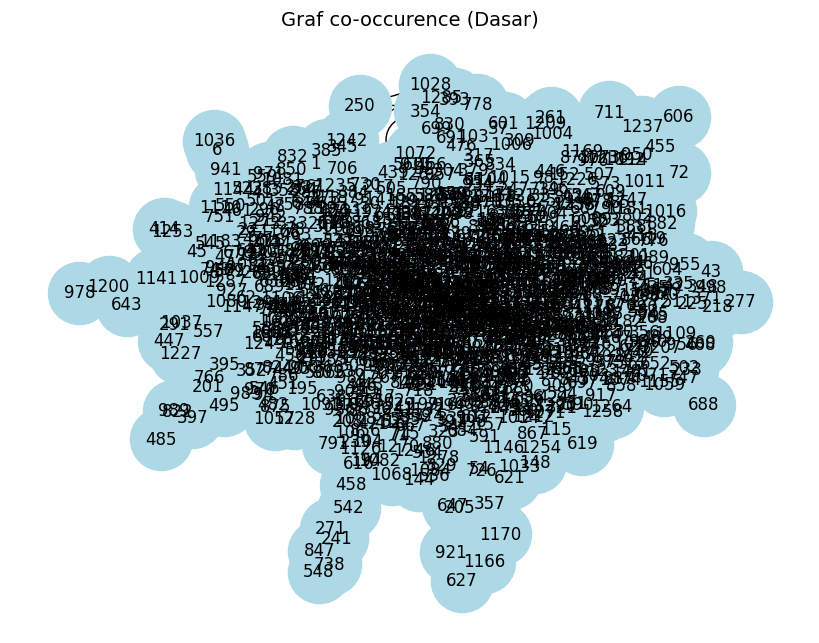

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("Graf co-occurence (Dasar)", fontsize=14)
plt.show()

In [ ]:
labels = {i: word for i, word in enumerate(co_matrix_df.index)}

In [ ]:
G = nx.relabel_nodes(G, labels)

In [ ]:
G.number_of_nodes()

1297

In [ ]:
G.number_of_edges()

5498

In [ ]:
list(G.edges(data=True))

[('parah', 'menelan', {'weight': 1}),
 ('parah', 'kebakaran', {'weight': 1}),
 ('parah', 'hutan', {'weight': 1}),
 ('parah', 'korban', {'weight': 1}),
 ('goals', 'development', {'weight': 1}),
 ('goals', 'sustainable', {'weight': 1}),
 ('goals', 'nuraisah', {'weight': 1}),
 ('goals', 'prossiding', {'weight': 1}),
 ('kebalikannya', 'hujan', {'weight': 1}),
 ('kebalikannya', 'kemarau', {'weight': 1}),
 ('kebalikannya', 'musim', {'weight': 2}),
 ('permasalahannya', 'individu', {'weight': 1}),
 ('permasalahannya', 'berperan', {'weight': 1}),
 ('permasalahannya', 'perubahan', {'weight': 1}),
 ('permasalahannya', 'iklim', {'weight': 1}),
 ('beliung', 'puting', {'weight': 2}),
 ('beliung', 'bandang', {'weight': 1}),
 ('beliung', 'siklon', {'weight': 1}),
 ('beliung', 'azizah', {'weight': 1}),
 ('beliung', '2022', {'weight': 1}),
 ('beliung', 'nina', {'weight': 1}),
 ('beliung', 'hailstone', {'weight': 1}),
 ('sulit', 'cuaca', {'weight': 1}),
 ('sulit', 'dipresiksi', {'weight': 1}),
 ('sulit',

In [ ]:
list(G.nodes())

['parah',
 'goals',
 'kebalikannya',
 'permasalahannya',
 'beliung',
 'sulit',
 'j',
 'dahuri',
 'the',
 'perhitungan',
 'pratama',
 'be',
 'tropis',
 'berupaya',
 'triutomo',
 'buletin',
 'mencair',
 '2005',
 'subiyanto',
 'ketut',
 'bertambahnya',
 'different',
 '5w',
 'ditimbulkan',
 'diperukan',
 'induced',
 'akresi',
 'baku',
 'kenyataan',
 'langsung',
 'didapatkan',
 'environment',
 'relasi',
 'kurniawan',
 'literature',
 'permukaan',
 'darurat',
 'kuznets',
 'hadir',
 'pollution',
 'perikanan',
 'me',
 'understanding',
 'kulit',
 'demam',
 'latar',
 'munculnya',
 'geofisika',
 'physiol',
 'runtunuwu',
 'international',
 'bidang',
 'daun',
 'bertahan',
 'nile',
 'hasnunidah',
 'ekosistem',
 'one',
 '20',
 'neraca',
 'kaitan',
 'islam',
 'kuat',
 'fakta',
 'lobel',
 'bahkah',
 '2004',
 'kehutanan',
 'bahagia',
 'pantai',
 'mencapai',
 'empiris',
 'nw',
 'puting',
 'agricultural',
 'kultivasi',
 'keterampilan',
 'fkip',
 'pencernaan',
 'mckee',
 'signifikan',
 'literatur',
 'dikena

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119862 (\N{MATHEMATICAL ITALIC CAPITAL C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119874 (\N{MATHEMATICAL ITALIC CAPITAL O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119867 (\N{MATHEMATICAL ITALIC CAPITAL H}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119886 (\N{MATHEMATICAL ITALIC SMALL A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119873 (\N{MATHEMATICAL ITALIC CAPITAL N}) missing from font(s) DejaVu 

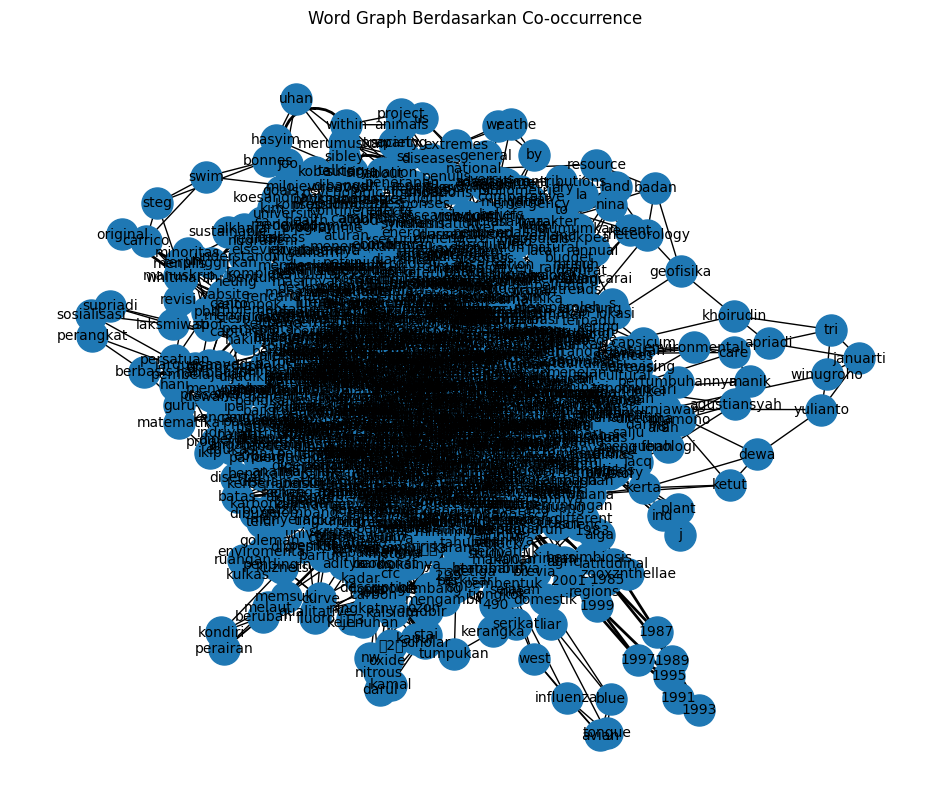

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graph kosong
G = nx.Graph()

# Menambahkan edge ke graph berdasarkan co-occurrence
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        # Tambahkan edge dengan bobot = frekuensi co-occurrence
        if count > 0:
            G.add_edge(word, neighbor, weight=count)

# Membuat layout graph
pos = nx.spring_layout(G, k=0.5, seed=42)

# Menggambar node dan edge
plt.figure(figsize=(12, 10))

# Edge dengan ketebalan sesuai bobot
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    width=[d['weight'] for (_, _, d) in edges]
)

# Node dan label
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Word Graph Berdasarkan Co-occurrence")
plt.axis("off")
plt.show()


# Tugas UAS
1. Mengekstrak dokumen pdf jurnal kemudian dinormalisasi angka, menghilangkan kata tidak jelas & kata karakter.
2. Membuat matrik coocurance dan graph serta pagerank.
3. Output berupa graph & nilai pagerank dari hasil graph

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 11.7 MB/s eta 0:00:00


In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.4 MB/s eta 0:00:00


# Ekstrak Paper

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



=== TOP 2-KATA (BIGRAM) PALING SERING MUNCUL ===
dan perubahan_iklim             →  16
di indonesia                    →  16
rata rata                       →  15
pendidikan fisika               →  12
global_warming dan              →  12
jurnal phi                      →  11
jurnal pendidikan               →  11
fisika dan                      →  11
silpinurrohmah gmail            →  11
gmail com                       →  11
dan pemanasan_global            →  11
tidak dapat                     →  11
phi jurnal                      →  10
dan fisika                      →  10
fisika terapan                  →  10
terapan vol                     →  10
vol issn                        →  10
issn hal                        →  10
ainurrohmah sudarti             →  10
sudarti perubahan               →  10
perubahan ikliklim              →  10
ikliklim dan                    →  10
pemanasan_global vol            →  10
vol silpinurrohmah              →  10
yang terjadi                    →  9
c

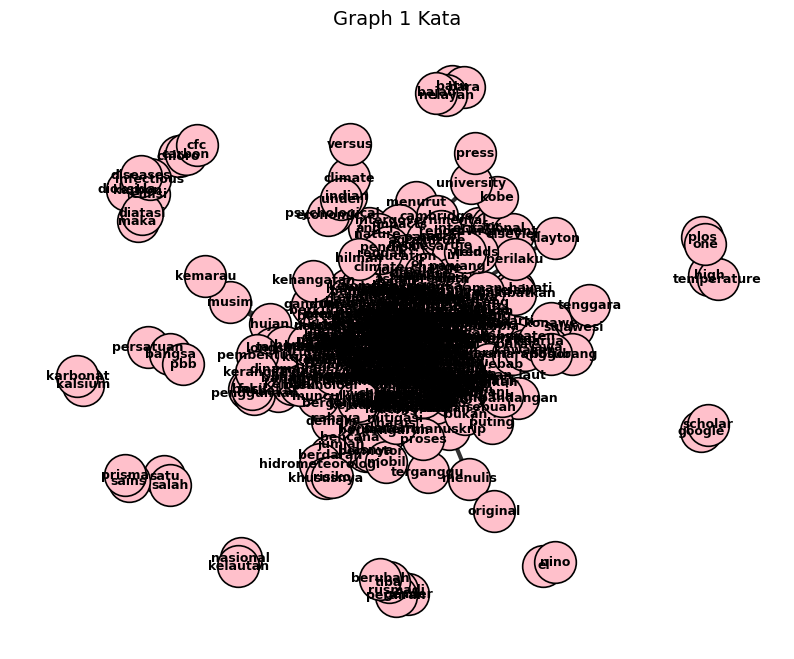

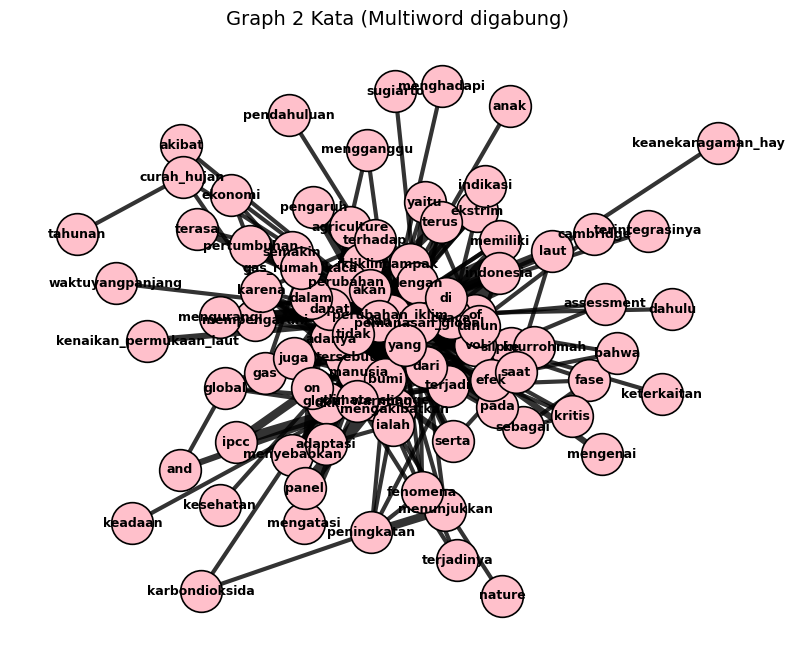


=== PAGE RANK GRAPH 1 ===
[('dan', 0.07288586896917724), ('yang', 0.037839848961144534), ('perubahan_iklim', 0.0254285057646433), ('di', 0.017835351520812334), ('suhu', 0.01508335319048832), ('dari', 0.012235276801088619), ('pemanasan_global', 0.011728739013070113), ('tidak', 0.010733372868909028), ('dapat', 0.01016229543000633), ('manusia', 0.008958988066963916), ('bumi', 0.008824015307144021), ('indonesia', 0.008708677084120263), ('tahun', 0.008569962691926551), ('rata', 0.008339593396952392), ('jurnal', 0.007148736247100153), ('adanya', 0.007097762744701204), ('dkk', 0.006967942637061252), ('tersebut', 0.006870737080129358), ('hutan', 0.006642727170859802), ('vol', 0.0065593242556823295)]

=== PAGE RANK GRAPH 2 ===
[('perubahan_iklim', 0.09932238577209335), ('dan', 0.08715180619057591), ('yang', 0.0647193021751796), ('pemanasan_global', 0.046488090971278415), ('climate_change', 0.033109478677309144), ('dapat', 0.027334064937811525), ('di', 0.02541102357795031), ('global_warming', 0

In [ ]:
import nltk
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pdfplumber
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter, defaultdict

nltk.download("punkt")

def extract_pdf(path):
    text = ""
    with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
            content = page.extract_text()
            if content:
                text += content + " "
    return text.lower()

# menggabungkan 2 kata kunci jd 1 token (regex)
def merge_multiword_keywords_regex(text, keywords):
    for kw in keywords:
        token = kw.replace(" ", "_")
        # pola regex: cocokkan semua variasi spasi
        pattern = re.compile(kw.replace(" ", r"\s+"), re.IGNORECASE)

        text = pattern.sub(token, text)
    return text

# normalisasi
def normalize_text(text):
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"[^a-zA-Z_\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    return text

from nltk.util import ngrams
from collections import Counter

def extract_top_bigrams(text, top_n=30):
    words = word_tokenize(text)

    bigrams = list(ngrams(words, 2))

    bigram_freq = Counter(bigrams)

    return bigram_freq.most_common(top_n)

top_bigrams = extract_top_bigrams(text, top_n=30)

print("\n=== TOP 2-KATA (BIGRAM) PALING SERING MUNCUL ===")
for bg, freq in top_bigrams:
    print(f"{' '.join(bg):30s}  →  {freq}")


# load pdf
pdf_path = "/content/drive/MyDrive/PPW/UAS/word_graph/paper global warming.pdf"
raw_text = extract_pdf(pdf_path)

# kata kunci
keywords_multi = [
    "perubahan iklim",
    "global warming",
    "climate change",
    "pemanasan global",
    "curah hujan",
    "gas rumah kaca",
    "karbondioksida",
    "keanekaragaman hayati",
    "kenaikan permukaan laut",
    "es mencair",
    "ketahanan pangan",
    "dampak lingkungan",
    "pembangunan berkelanjutan"

]



# menggabungkan multiword
raw_text = merge_multiword_keywords_regex(raw_text, keywords_multi)

# normalisasi
text = normalize_text(raw_text)

# tokenisasi
sentences = sent_tokenize(text)
tokenized = [word_tokenize(s) for s in sentences]

# coocurrance
def build_cooccurrence(tokenized_sentences, window_size=2):
    cooc = defaultdict(Counter)
    for sentence in tokenized_sentences:
        for i, word in enumerate(sentence):
            window = sentence[i+1:i+1+window_size]
            for w in window:
                if w != word:
                    cooc[word][w] += 1
                    cooc[w][word] += 1
    return cooc

co_matrix = build_cooccurrence(tokenized)

# graph 1
def build_graph(cooc, min_weight=2):
    G = nx.Graph()
    for w, neigh in cooc.items():
        for n, freq in neigh.items():
            if freq >= min_weight:
                G.add_edge(w, n, weight=freq)
    return G

G_single = build_graph(co_matrix)

# graph 2 -> multiword
# ubah keyword jadi token multiword (pakai underscore)
keyword_nodes = [kw.replace(" ", "_") for kw in keywords_multi]

# kumpulkan semua keyword yang muncul
existing_keywords = [n for n in G_single.nodes() if n in keyword_nodes]

# kumpulkan tetangga keyword agar graph terhubung
neighbors = set()
for kw in existing_keywords:
    if kw in G_single:
        neighbors.update(G_single.neighbors(kw))

# graph 2 = keyword multiword + tetangganya
subgraph_nodes = set(existing_keywords) | neighbors
G_multiword = G_single.subgraph(subgraph_nodes).copy()

print("Node Graph 2 =", len(G_multiword.nodes()))
print("Edge Graph 2 =", len(G_multiword.edges()))


# visualisasi graph
def draw_graph(G, title):
    plt.figure(figsize=(10, 8))

    # posisi node
    pos = nx.spring_layout(G, k=0.65, seed=42)

    # ambil weight edge
    weights = [G[u][v]['weight'] for u, v in G.edges()]

    # node
    nx.draw_networkx_nodes(
        G, pos,
        node_size=900,
        node_color='pink',
        edgecolors='black',
        linewidths=1.2
    )

    # edge (garis antar node)
    nx.draw_networkx_edges(
        G, pos,
        width=[w * 1.5 for w in weights],  # garis lebih tebal
        alpha=0.8
    )

    # label node
    nx.draw_networkx_labels(
        G, pos,
        font_size=9,
        font_weight='bold'
    )

    # judul
    plt.title(title, fontsize=14)
    plt.axis("off")
    plt.show()


# GRAPH KELUAR
draw_graph(G_single, "Graph 1 Kata")
draw_graph(G_multiword, "Graph 2 Kata (Multiword digabung)")

# pagerank
pagerank_single = nx.pagerank(G_single)
pagerank_multi = nx.pagerank(G_multiword)

print("\n=== PAGE RANK GRAPH 1 ===")
print(sorted(pagerank_single.items(), key=lambda x: -x[1])[:20])

print("\n=== PAGE RANK GRAPH 2 ===")
print(sorted(pagerank_multi.items(), key=lambda x: -x[1]))
